<a href="https://colab.research.google.com/github/leyli16/HousingPricePrediction/blob/main/final_project_merged.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import os

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# USA Real Estate Data Wrangling, Cleaning, and EDA

## Loading in USA Real Estate Dataset


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahmedshahriarsakib/usa-real-estate-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/usa-real-estate-dataset


In [3]:
files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['realtor-data.zip.csv']


In [4]:
file_path = os.path.join(path, 'realtor-data.zip.csv')
df_raw = pd.read_csv(file_path)

In [5]:
df_raw.head(10)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
5,103378.0,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,612.0,2520.0,NaN
6,1205.0,for_sale,50000.0,3.0,1.0,0.20,1298094.0,Ciales,Puerto Rico,639.0,2040.0,NaN
7,50739.0,for_sale,71600.0,3.0,2.0,0.08,1048466.0,Ponce,Puerto Rico,731.0,1050.0,NaN
8,81909.0,for_sale,100000.0,2.0,1.0,0.09,734904.0,Ponce,Puerto Rico,730.0,1092.0,NaN
9,65672.0,for_sale,300000.0,5.0,3.0,7.46,1946226.0,Las Marias,Puerto Rico,670.0,5403.0,NaN


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [7]:
df_raw.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [8]:
df_raw.describe(include = 'object')

,status,city,state,prev_sold_date
count,2226382,2224975,2226374,1492085
unique,3,20098,55,14954
top,for_sale,Houston,Florida,2022-03-31
freq,1389306,23862,249432,17171


## Cleaning up USA Real Estate data

### Duplicates checking

In [9]:
df_raw.duplicated().sum()

np.int64(0)

### Column Filtering

In [10]:
# Keep only the necessary columns
df_req_cols = df_raw [['price', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code', 'house_size', 'status']]

### Drop nulls

In [11]:
total_missing = df_req_cols.isna().sum()*100/len(df_req_cols)
print('Percentage Missing Value %')
total_missing

Percentage Missing Value %


,0
price,0.069215
bed,21.618797
bath,22.986666
acre_lot,14.624130
city,0.063197
state,0.000359
zip_code,0.013430
house_size,25.533983
status,0.000000


In [12]:
# Drop nulls, reset and drop the index
df_nadropped = df_req_cols.dropna().reset_index(drop=True)
df_nadropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360347 entries, 0 to 1360346
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   price       1360347 non-null  float64
 1   bed         1360347 non-null  float64
 2   bath        1360347 non-null  float64
 3   acre_lot    1360347 non-null  float64
 4   city        1360347 non-null  object 
 5   state       1360347 non-null  object 
 6   zip_code    1360347 non-null  float64
 7   house_size  1360347 non-null  float64
 8   status      1360347 non-null  object 
dtypes: float64(6), object(3)
memory usage: 93.4+ MB


In [13]:
total_missing = df_nadropped.isna().sum()*100/len(df_nadropped)
print('Percentage Missing Value %')
total_missing

Percentage Missing Value %


,0
price,0.0
bed,0.0
bath,0.0
acre_lot,0.0
city,0.0
state,0.0
zip_code,0.0
house_size,0.0
status,0.0


### Data type casting

In [14]:
# cast date types
df_typed = df_nadropped.astype({'price': 'float', 'bed': 'int', 'bath': 'int', 'acre_lot': 'float', 'city':'str', 'state':'str', 'zip_code':'int', 'house_size': 'float'})

In [15]:
df_typed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360347 entries, 0 to 1360346
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   price       1360347 non-null  float64
 1   bed         1360347 non-null  int64  
 2   bath        1360347 non-null  int64  
 3   acre_lot    1360347 non-null  float64
 4   city        1360347 non-null  object 
 5   state       1360347 non-null  object 
 6   zip_code    1360347 non-null  int64  
 7   house_size  1360347 non-null  float64
 8   status      1360347 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 93.4+ MB


### Filter listings with sold status only and add price_per_sqft column

In [16]:
# Filter rows with status = sold
df_sold = df_typed[df_typed['status'] == 'sold'].drop(columns=['status'])

In [17]:
df_sold.head()

,price,bed,bath,acre_lot,city,state,zip_code,house_size
750602,524900.0,3,2,0.09,Aguada,Puerto Rico,602,2200.0
750603,90000.0,3,2,0.08,Aguadilla,Puerto Rico,603,1421.0
750604,22500.0,2,1,0.32,Anasco,Puerto Rico,610,850.0
750605,168000.0,6,4,0.05,Anasco,Puerto Rico,610,3422.0
750606,200000.0,3,1,4.98,Arecibo,Puerto Rico,612,580.0


In [18]:
df_sold.info()

<class 'pandas.core.frame.DataFrame'>
Index: 609745 entries, 750602 to 1360346
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   price       609745 non-null  float64
 1   bed         609745 non-null  int64  
 2   bath        609745 non-null  int64  
 3   acre_lot    609745 non-null  float64
 4   city        609745 non-null  object 
 5   state       609745 non-null  object 
 6   zip_code    609745 non-null  int64  
 7   house_size  609745 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 41.9+ MB


### Remove outliers for USA Real Estate data

In [19]:
# IQR Method to remove outliers
# Define function for IQR filtering
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df
columns = ['price', 'bed', 'bath', 'acre_lot', 'house_size']
# Apply to the columns
df_sold_outlier_removed = remove_outliers_iqr(df_sold, columns)

In [ ]:
# Effect of removing outliers
def boxplot_compare(df_original, df_filtered, cols):
    fig, axes = plt.subplots(len(cols), 2, figsize=(12, 4 * len(cols)))
    for i, col in enumerate(cols):
        sns.boxplot(x=df_original[col], ax=axes[i][0])
        axes[i][0].set_title(f'Original: {col}')
        sns.boxplot(x=df_filtered[col], ax=axes[i][1])
        axes[i][1].set_title(f'Filtered: {col}')
    plt.tight_layout()
    plt.show()

boxplot_compare(df_sold, df_sold_outlier_removed, columns)

In [21]:
df_sold_outlier_removed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449027 entries, 750602 to 1360345
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   price       449027 non-null  float64
 1   bed         449027 non-null  int64  
 2   bath        449027 non-null  int64  
 3   acre_lot    449027 non-null  float64
 4   city        449027 non-null  object 
 5   state       449027 non-null  object 
 6   zip_code    449027 non-null  int64  
 7   house_size  449027 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 30.8+ MB


### USA Real Estate data cleaned

In [22]:
# save the cleaned df to df_real_estate
df_real_estate = df_sold_outlier_removed

In [23]:
df_real_estate.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,4.490270e+05,449027.000000,449027.000000,449027.000000,449027.000000,449027.000000
mean,3.821518e+05,3.173598,2.247671,0.200624,57593.322001,1731.338002
std,2.182448e+05,0.751535,0.772791,0.126210,30128.125107,585.856441
min,1.000000e+00,2.000000,1.000000,0.000000,602.000000,100.000000
25%,2.249000e+05,3.000000,2.000000,0.120000,30339.000000,1286.000000
50%,3.390000e+05,3.000000,2.000000,0.170000,60631.000000,1638.000000
75%,4.985435e+05,4.000000,3.000000,0.250000,85388.000000,2094.000000
max,1.117000e+06,5.000000,4.000000,0.670000,99403.000000,3418.000000


## Distribution of house price by number of beds

In [ ]:
sns.boxplot(x='bed', y='price', data=df_real_estate)
plt.title('Price by Number of Bedrooms')
plt.show()

In [ ]:
# Distributation of house price by number of beds
fig = px.histogram(df_real_estate, x="price", color="bed", nbins=20)
fig.update_layout(title="Distribution of House Price by Bed", xaxis_title="Price", yaxis_title="Count")
fig.show()

## Distribution of house price by number of bathrooms

In [ ]:
sns.boxplot(x='bath', y='price', data=df_real_estate)
plt.title('Price by Number of Bathrooms')
plt.show()

In [ ]:
# Distribution of house price by number of baths
fig = px.histogram(df_real_estate, x="price", color="bath", nbins=20)
fig.update_layout(title="Distribution of House Price by Bath", xaxis_title="Price", yaxis_title="Count")
fig.show()

## Distribution of house price by state

In [ ]:
fig = px.bar(df_real_estate.groupby(["state"])['price'].mean().reset_index(),
             x='state', y='price',width=700)
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'},
                 title="Distribution of house price by state.")
fig.update_xaxes(type="category",tickangle=-70)
fig.show()

In [ ]:
# Sort states by median price
state_order = df_real_estate.groupby('state')['price'].median().sort_values(ascending=False).index.tolist()

# Plot with custom sort order
fig = px.box(df_real_estate, x='state', y='price', category_orders={'state': state_order},
             points=False, title='House Price Distribution by State (Sorted)',
             width=600, height=400)
fig.update_layout(xaxis_title='State', yaxis_title='Price', xaxis_tickangle=-45)
fig.show()

## Loading in Zip code to County Dataset

In [30]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("danofer/zipcodes-county-fips-crosswalk")

print("Path to dataset files:", path)

100%|██████████| 184k/184k [00:00<00:00, 50.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/danofer/zipcodes-county-fips-crosswalk/versions/1


In [31]:
files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['ZIP-COUNTY-FIPS_2017-06.csv']


In [32]:
file_path = os.path.join(path, 'ZIP-COUNTY-FIPS_2017-06.csv')
zip_county_df_raw = pd.read_csv(file_path)

In [33]:
zip_county_df_raw.head(10)

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,1001,H1
1,36006,Autauga County,AL,1001,H1
2,36067,Autauga County,AL,1001,H1
3,36066,Autauga County,AL,1001,H1
4,36703,Autauga County,AL,1001,H1
5,36701,Autauga County,AL,1001,H1
6,36091,Autauga County,AL,1001,H1
7,36051,Autauga County,AL,1001,H1
8,36068,Autauga County,AL,1001,H1
9,36008,Autauga County,AL,1001,H1


In [34]:
zip_county_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52889 entries, 0 to 52888
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ZIP         52889 non-null  int64 
 1   COUNTYNAME  52889 non-null  object
 2   STATE       52889 non-null  object
 3   STCOUNTYFP  52889 non-null  int64 
 4   CLASSFP     52889 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.0+ MB


## Cleaning up Zip Code to County Dataset

### Duplicates and null checking

In [35]:
zip_county_df_raw.duplicated().sum()

np.int64(0)

In [36]:
total_missing = zip_county_df_raw.isna().sum() * 100 / len(zip_county_df_raw)
print('Percentage Missing Value %')
total_missing

Percentage Missing Value %


,0
ZIP,0.0
COUNTYNAME,0.0
STATE,0.0
STCOUNTYFP,0.0
CLASSFP,0.0


### Data type casting

In [37]:
# cast date types
zip_county_df = zip_county_df_raw.astype({'ZIP': 'int', 'COUNTYNAME':'str', 'STATE':'str'})

In [38]:
zip_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52889 entries, 0 to 52888
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ZIP         52889 non-null  int64 
 1   COUNTYNAME  52889 non-null  object
 2   STATE       52889 non-null  object
 3   STCOUNTYFP  52889 non-null  int64 
 4   CLASSFP     52889 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.0+ MB


### Column renaming

In [39]:
zip_county_df.rename(columns={'ZIP': 'zip_code', 'COUNTYNAME':'county', 'STATE':'state'}, inplace=True)

### Column Filtering

In [40]:
zip_county_df.drop(columns=['STCOUNTYFP', 'CLASSFP'], inplace=True)

### Row Filtering

In [41]:
# count unique counties per ZIP code
zip_counts = zip_county_df['zip_code'].value_counts()

# Step 1: Find ZIP codes with only one county
zips_one_county = zip_counts[zip_counts == 1].index
# Step 2: Filter out rows with those ZIP codes
zip_county_df = zip_county_df[zip_county_df['zip_code'].isin(zips_one_county)]

In [42]:
zip_county_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29102 entries, 0 to 52888
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   zip_code  29102 non-null  int64 
 1   county    29102 non-null  object
 2   state     29102 non-null  object
dtypes: int64(1), object(2)
memory usage: 909.4+ KB


## Create new column "county" in USA Real Estate Dataset

In [43]:
# Merge df with zip_county_df to get county info
real_estate_df = pd.merge(df_real_estate, zip_county_df, on='zip_code', how='inner')
real_estate_df.drop(columns=['state_x'], inplace=True)
real_estate_df.rename(columns={'state_y':'state'},inplace=True)
real_estate_df.head(10)

,price,bed,bath,acre_lot,city,zip_code,house_size,county,state
0,22500.0,2,1,0.32,Anasco,610,850.0,Anasco Municipio,PR
1,120000.0,4,2,0.18,Sabana Grande,637,1188.0,Sabana Grande Municipio,PR
2,133000.0,3,1,0.60,Hatillo,659,1049.0,Hatillo Municipio,PR
3,220000.0,5,3,0.11,Isabela,662,2992.0,Isabela Municipio,PR
4,175000.0,3,3,0.45,Las Marias,670,3090.0,Las Marias Municipio,PR
5,149000.0,3,2,0.28,Mayaguez,682,2000.0,Mayaguez Municipio,PR
6,130000.0,3,2,0.07,Ponce,716,1024.0,Ponce Municipio,PR
7,140000.0,4,3,0.10,Naguabo,718,2222.0,Naguabo Municipio,PR
8,68900.0,3,1,0.09,Naguabo,718,900.0,Naguabo Municipio,PR
9,57900.0,3,1,0.24,Ponce,731,845.0,Ponce Municipio,PR


In [44]:
real_estate_df.shape

(338278, 9)

In [45]:
real_estate_df.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,3.382780e+05,338278.000000,338278.000000,338278.000000,338278.000000,338278.000000
mean,3.985179e+05,3.162272,2.236291,0.192204,59252.218084,1715.579503
std,2.228088e+05,0.754238,0.768575,0.121180,30860.386727,580.194862
min,1.000000e+00,2.000000,1.000000,0.000000,610.000000,100.000000
25%,2.350000e+05,3.000000,2.000000,0.120000,32505.000000,1275.000000
50%,3.500000e+05,3.000000,2.000000,0.170000,63301.000000,1622.000000
75%,5.200000e+05,4.000000,3.000000,0.240000,89439.000000,2071.000000
max,1.117000e+06,5.000000,4.000000,0.670000,99402.000000,3418.000000


In [46]:
real_estate_df.describe(include = 'object')

,city,county,state
count,338278,338278,338278
unique,6438,1147,50
top,Houston,Maricopa County,CA
freq,8452,13488,59085


## Loading in Zip Code Demographics

In [47]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("erdi28/zip-codes-demographics")

print("Path to dataset files:", path)

100%|██████████| 2.28M/2.28M [00:00<00:00, 106MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/erdi28/zip-codes-demographics/versions/3


In [48]:
files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['zip_code_demographics.csv']


In [49]:
file_path = os.path.join(path, 'zip_code_demographics.csv')
zip_code_demographics_df_raw = pd.read_csv(file_path)

In [50]:
zip_code_demographics_df_raw.head(10)

,zip,lat,lng,city,state_id,state_name,population,density,county_name,po_box,dist_highway,dist2_large_airport,dist2_medium_airport,dist_to_shore,number_of_business,adjusted_gross_income,total_income_amount,number_of_returns
0,1001,42.06262,-72.62521,Agawam,MA,Massachusetts,16088,550.1,Hampden,0,1.387035,106.145765,12.946212,93.049251,438.0,598807,6.047690e+05,9320
1,1002,42.37633,-72.46462,Amherst,MA,Massachusetts,27323,198.1,Hampshire,0,14.438177,112.264368,21.080079,133.370144,571.0,989558,1.005796e+06,9880
2,1005,42.42117,-72.10655,Barre,MA,Massachusetts,4947,44.2,Worcester,0,16.788339,90.664964,25.547718,97.639881,97.0,164207,1.660540e+05,2490
3,1007,42.28163,-72.40009,Belchertown,MA,Massachusetts,15304,107.7,Hampshire,0,13.663839,101.552921,14.762395,114.406034,217.0,647074,6.547390e+05,7970
4,1008,42.18234,-72.95819,Blandford,MA,Massachusetts,1171,7.4,Hampden,0,2.593655,136.548797,20.177950,107.466779,18.0,47826,4.824100e+04,660
5,1010,42.12904,-72.20597,Brimfield,MA,Massachusetts,3703,40.6,Hampden,0,4.737271,78.645500,28.049262,94.928024,73.0,155666,1.576770e+05,1980
6,1011,42.30233,-72.96448,Chester,MA,Massachusetts,1332,15.7,Hampden,0,8.058693,142.414627,26.041908,128.563170,13.0,38223,3.855300e+04,630
7,1012,42.38495,-72.84675,Chesterfield,MA,Massachusetts,503,16.1,Hampshire,0,18.331096,138.381684,27.466664,137.693285,10.0,24826,2.510200e+04,410
8,1013,42.16059,-72.60788,Chicopee,MA,Massachusetts,22709,1549.1,Hampden,0,0.062286,109.114246,7.075893,104.576258,317.0,516431,5.201740e+05,11270
9,1020,42.17618,-72.56538,Chicopee,MA,Massachusetts,30704,951.4,Hampden,0,0.925140,106.769095,3.205533,105.789421,550.0,828125,8.346140e+05,15760


In [51]:
zip_code_demographics_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33704 entries, 0 to 33703
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   zip                    33704 non-null  int64  
 1   lat                    33704 non-null  float64
 2   lng                    33704 non-null  float64
 3   city                   33704 non-null  object 
 4   state_id               33704 non-null  object 
 5   state_name             33704 non-null  object 
 6   population             33704 non-null  int64  
 7   density                33704 non-null  float64
 8   county_name            33704 non-null  object 
 9   po_box                 33704 non-null  int64  
 10  dist_highway           33704 non-null  float64
 11  dist2_large_airport    33704 non-null  float64
 12  dist2_medium_airport   33704 non-null  float64
 13  dist_to_shore          33704 non-null  float64
 14  number_of_business     33624 non-null  float64
 15  ad

In [52]:
zip_code_demographics_df_raw.describe()

,zip,lat,lng,population,density,po_box,dist_highway,dist2_large_airport,dist2_medium_airport,dist_to_shore,number_of_business,adjusted_gross_income,total_income_amount,number_of_returns
count,33704.000000,33704.000000,33704.000000,33704.000000,33704.000000,33704.000000,33704.000000,33704.000000,33704.000000,33704.000000,33624.000000,3.370400e+04,3.370400e+04,33704.000000
mean,49842.607821,38.888195,-91.051366,11287.959738,528.704068,0.179949,29.291294,158.648048,40.854624,304.798736,260.694920,4.251341e+05,4.298943e+05,5341.873665
std,27451.111442,5.228075,15.460095,15200.216997,2219.277025,0.384151,174.104869,166.207042,80.224956,298.948686,432.112814,7.561519e+05,7.644416e+05,7273.613660
min,1001.000000,-14.219840,-176.629620,0.000000,0.000000,0.000000,0.000194,0.112768,0.134153,0.011449,1.000000,5.770000e+02,5.770000e+02,90.000000
25%,27052.750000,35.427243,-97.255342,1253.750000,8.200000,0.000000,3.050420,59.434074,19.513217,61.286177,19.000000,3.247500e+04,3.287925e+04,580.000000
50%,49780.500000,39.502970,-88.224820,4099.000000,29.000000,0.000000,11.541912,125.957938,35.131017,207.328858,74.000000,1.128665e+05,1.140365e+05,1880.000000
75%,72210.250000,42.110000,-80.289333,16113.250000,238.825000,0.000000,30.046597,209.476362,55.231087,471.857289,334.000000,5.052290e+05,5.092270e+05,7560.000000
max,99929.000000,71.274340,144.876370,130352.000000,68424.500000,1.000000,10767.713382,6127.454722,5101.697518,1336.551268,7263.000000,1.522467e+07,1.527798e+07,61920.000000


In [53]:
zip_code_demographics_df_raw.describe(include = 'object')

,city,state_id,state_name,county_name
count,33704,33704,33704,33704
unique,17551,51,51,1800
top,Houston,TX,Texas,Washington
freq,106,1990,1990,401


## Cleaning Zip Code Demographics Data

In [54]:
zip_code_demographics_df_raw.duplicated().sum()

np.int64(0)

In [55]:
# Keep only the necessary columns
zip_code_demographics_df = zip_code_demographics_df_raw [['zip', 'population', 'density', 'dist_highway', 'dist2_large_airport', 'dist_to_shore', 'number_of_business', 'adjusted_gross_income']]

In [56]:
total_missing = zip_code_demographics_df.isna().sum() * 100 / len(zip_code_demographics_df)
print('Percentage Missing Value %')
total_missing

Percentage Missing Value %


,0
zip,0.000000
population,0.000000
density,0.000000
dist_highway,0.000000
dist2_large_airport,0.000000
dist_to_shore,0.000000
number_of_business,0.237361
adjusted_gross_income,0.000000


In [57]:
# Drop nulls
zip_code_demographics_df = zip_code_demographics_df.dropna()
# Reset and drop the index
zip_code_demographics_df = zip_code_demographics_df.reset_index(drop=True)

In [58]:
total_missing = zip_code_demographics_df.isna().sum() * 100 / len(zip_code_demographics_df)
print('Percentage Missing Value %')
total_missing

Percentage Missing Value %


,0
zip,0.0
population,0.0
density,0.0
dist_highway,0.0
dist2_large_airport,0.0
dist_to_shore,0.0
number_of_business,0.0
adjusted_gross_income,0.0


In [59]:
# cast date types
zip_code_demographics_df = zip_code_demographics_df.astype({'zip': 'int', 'population': 'float', 'density': 'float', 'dist_highway': 'float', 'dist2_large_airport': 'float', 'dist_to_shore': 'float', 'number_of_business': 'float', 'adjusted_gross_income': 'float'})

In [60]:
zip_code_demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33624 entries, 0 to 33623
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   zip                    33624 non-null  int64  
 1   population             33624 non-null  float64
 2   density                33624 non-null  float64
 3   dist_highway           33624 non-null  float64
 4   dist2_large_airport    33624 non-null  float64
 5   dist_to_shore          33624 non-null  float64
 6   number_of_business     33624 non-null  float64
 7   adjusted_gross_income  33624 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 2.1 MB


In [61]:
zip_code_demographics_df.rename(columns={'zip': 'zip_code',
                                         'density':'population_density',
                                         'dist_highway':'dist_to_highway',
                                         'dist2_large_airport':'dist_to_airport'}, inplace=True)

## Merge real_estate_df with zip_code_demographics_df to add the zip code related features

In [62]:
real_estate_features_df = pd.merge(real_estate_df, zip_code_demographics_df, on='zip_code', how='inner')
real_estate_features_df.head(10)

,price,bed,bath,acre_lot,city,zip_code,house_size,county,state,population,population_density,dist_to_highway,dist_to_airport,dist_to_shore,number_of_business,adjusted_gross_income
0,215000.0,3,2,0.19,Chicopee,1020,1828.0,Hampden County,MA,30704.0,951.4,0.925140,106.769095,105.789421,550.0,828125.0
1,269900.0,2,1,0.46,South Hadley,1075,1312.0,Hampshire County,MA,18051.0,393.3,2.910859,112.181953,115.181126,297.0,697896.0
2,314900.0,5,2,0.28,Chicopee,1013,2219.0,Hampden County,MA,22709.0,1549.1,0.062286,109.114246,104.576258,317.0,516431.0
3,244999.0,4,1,0.23,Springfield,1104,1285.0,Hampden County,MA,23226.0,1714.0,0.645911,104.785728,101.063511,528.0,453300.0
4,399900.0,3,3,0.35,Easthampton,1027,1380.0,Hampshire County,MA,17708.0,168.5,9.873599,125.949999,124.367513,372.0,671249.0
5,198000.0,2,1,0.14,Holyoke,1040,768.0,Hampden County,MA,38480.0,702.0,0.598474,114.170265,111.173366,907.0,832429.0
6,299900.0,3,1,0.40,Easthampton,1027,1424.0,Hampshire County,MA,17708.0,168.5,9.873599,125.949999,124.367513,372.0,671249.0
7,279000.0,3,1,0.23,Ludlow,1056,1164.0,Hampden County,MA,21050.0,298.9,2.608102,99.921771,105.057502,412.0,747067.0
8,319900.0,3,1,0.41,Northampton,1062,864.0,Hampshire County,MA,9835.0,217.6,3.630387,122.235452,124.761768,191.0,639133.0
9,264900.0,3,2,0.40,Holyoke,1040,1776.0,Hampden County,MA,38480.0,702.0,0.598474,114.170265,111.173366,907.0,832429.0


In [63]:
real_estate_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338148 entries, 0 to 338147
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   price                  338148 non-null  float64
 1   bed                    338148 non-null  int64  
 2   bath                   338148 non-null  int64  
 3   acre_lot               338148 non-null  float64
 4   city                   338148 non-null  object 
 5   zip_code               338148 non-null  int64  
 6   house_size             338148 non-null  float64
 7   county                 338148 non-null  object 
 8   state                  338148 non-null  object 
 9   population             338148 non-null  float64
 10  population_density     338148 non-null  float64
 11  dist_to_highway        338148 non-null  float64
 12  dist_to_airport        338148 non-null  float64
 13  dist_to_shore          338148 non-null  float64
 14  number_of_business     338148 non-nu

In [64]:
real_estate_features_df.describe()

,price,bed,bath,acre_lot,zip_code,house_size,population,population_density,dist_to_highway,dist_to_airport,dist_to_shore,number_of_business,adjusted_gross_income
count,3.381480e+05,338148.000000,338148.000000,338148.000000,338148.000000,338148.000000,338148.000000,338148.000000,338148.000000,338148.000000,338148.000000,338148.000000,3.381480e+05
mean,3.985160e+05,3.162272,2.236263,0.192209,59261.692052,1715.619681,35183.865905,1205.825783,6.331339,78.152613,187.680797,678.352136,1.261296e+06
std,2.227892e+05,0.754211,0.768534,0.121162,30852.169233,580.190767,19180.403151,1350.849182,12.922188,103.741284,239.755605,468.528140,9.092380e+05
min,1.000000e+00,2.000000,1.000000,0.000000,1001.000000,100.000000,0.000000,0.000000,0.000283,0.424420,0.011449,1.000000,2.925000e+03
25%,2.350000e+05,3.000000,2.000000,0.120000,32506.000000,1275.000000,21670.000000,293.500000,1.328307,19.921847,20.759234,335.000000,6.438270e+05
50%,3.500000e+05,3.000000,2.000000,0.170000,63301.000000,1622.000000,33096.000000,867.800000,2.829334,36.951682,73.724405,586.000000,1.074226e+06
75%,5.200000e+05,4.000000,3.000000,0.240000,89439.000000,2071.000000,45792.000000,1695.200000,5.967586,92.247183,314.774612,916.000000,1.632569e+06
max,1.117000e+06,5.000000,4.000000,0.670000,99402.000000,3418.000000,130352.000000,49565.300000,299.940968,994.951376,1330.442647,7263.000000,1.207523e+07


In [65]:
real_estate_features_df.describe(include = 'object')

,city,county,state
count,338148,338148,338148
unique,6399,1126,48
top,Houston,Maricopa County,CA
freq,8452,13488,59048


## Remove outliers

In [66]:
cols_to_check = ['population', 'population_density', 'dist_to_highway',
                 'dist_to_airport', 'dist_to_shore', 'number_of_business',
                 'adjusted_gross_income']

In [67]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

real_estate_features_df = remove_outliers_iqr(real_estate_features_df, cols_to_check)

In [68]:
real_estate_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227566 entries, 0 to 335515
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   price                  227566 non-null  float64
 1   bed                    227566 non-null  int64  
 2   bath                   227566 non-null  int64  
 3   acre_lot               227566 non-null  float64
 4   city                   227566 non-null  object 
 5   zip_code               227566 non-null  int64  
 6   house_size             227566 non-null  float64
 7   county                 227566 non-null  object 
 8   state                  227566 non-null  object 
 9   population             227566 non-null  float64
 10  population_density     227566 non-null  float64
 11  dist_to_highway        227566 non-null  float64
 12  dist_to_airport        227566 non-null  float64
 13  dist_to_shore          227566 non-null  float64
 14  number_of_business     227566 non-null  f

## Influence of regional features on house price



*   The price ranges from 0 to $1.117M since we removed the outliers of the USA real estate dataframe.
*   There are vertical lines observed in the graph since houses from the same zip_code have the same regional features; we merged regional features dataframe with the main dataframe on zip_code.



In [ ]:
import plotly.express as px
import plotly.io as pio

pio.templates.default = "plotly_white"

features = ['population', 'population_density', 'dist_to_highway', 'dist_to_airport',
            'dist_to_shore', 'number_of_business', 'adjusted_gross_income']

for feature in features:
    fig = px.scatter(
        real_estate_features_df,
        x=feature,
        y='price',
        trendline='ols',
        title=f'House Price vs {feature.replace("_", " ").title()}',
        labels={feature: feature.replace("_", " ").title(), 'price': 'House Price ($)'},
        opacity=0.6,
        width=700,
        height=450
    )

    # Make scatter points subtle
    fig.update_traces(marker=dict(size=5, color='lightgray'), selector=dict(mode='markers'))

    # Make trendline bold and obvious
    fig.update_traces(
        line=dict(color='red', width=4, dash='solid'),
        selector=dict(mode='lines')  # This targets the trendline
    )

    fig.update_layout(
        title_font_size=18,
        title_x=0.5,
        margin=dict(l=40, r=40, t=60, b=40),
        xaxis=dict(gridcolor='lightgray'),
        yaxis=dict(gridcolor='lightgray')
    )

    fig.show()


*   Features that have positive correlation with price:
  *   Population (more populated the area, higher the price)
  *   Population Density (more densly populated the area, higher the price)
  *   Number of bussinesses (more bussiness in the area, higher the price)
  *   Adjusted gross income (wealthier the region, higher the price)
  *   Distance to highway (Further from highway, higher the price)

*   Features that have negative correlation with price:
  *   Distance to airport (more accessible to airport, higher the price)
  *   Distance to shore (closer to the shore, higher the house price)







Import Library


In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt
import datetime as dt
import requests
from lxml import html
import math
import json
import re
import os

# 1. County Demographics Data Cleaning and Wrangling


## 1.1 Loading County Demogrphics Dataset

In [71]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("glozab/county-level-us-demographic-data-1990-2020")

print("Path to dataset files:", path)

100%|██████████| 13.1M/13.1M [00:00<00:00, 132MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/glozab/county-level-us-demographic-data-1990-2020/versions/1


In [72]:
files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['county_demographics.csv']


In [73]:
file_path = os.path.join(path, 'county_demographics.csv')
county_demographics_df_raw = pd.read_csv(file_path)

print(county_demographics_df_raw.head())

   year  fips  population  w_population  b_population  o_population  \
0  1990  1025       27289         15579         11643            35   
1  1990  1031       40293         32869          6950           160   
2  1990  1041       13598         10068          3516            11   
3  1990  1053       35526         24377         10050          1045   
4  1990  1101      209537        119702         87856           415   

   nh_population  hi_population  na_population  male_population  ...  \
0          27196             93              0            13052  ...   
1          39831            462              0            19673  ...   
2          13576             22              0             6421  ...   
3          35378            148              0            17454  ...   
4         207933           1604              0            98854  ...   

   age9_population_ratio  age10_population_ratio  age11_population_ratio  \
0                0.06263                 0.05552                

## 1.2 County Demographics Dataset Cleaning

In [74]:
county_demographics_df_raw.dtypes

,0
year,int64
fips,int64
population,int64
w_population,int64
b_population,int64
o_population,int64
nh_population,int64
hi_population,int64
na_population,int64
male_population,int64


In [75]:
county_demographics_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97287 entries, 0 to 97286
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     97287 non-null  int64  
 1   fips                     97287 non-null  int64  
 2   population               97287 non-null  int64  
 3   w_population             97287 non-null  int64  
 4   b_population             97287 non-null  int64  
 5   o_population             97287 non-null  int64  
 6   nh_population            97287 non-null  int64  
 7   hi_population            97287 non-null  int64  
 8   na_population            97287 non-null  int64  
 9   male_population          97287 non-null  int64  
 10  female_population        97287 non-null  int64  
 11  age0_population          97287 non-null  int64  
 12  age1_population          97287 non-null  int64  
 13  age2_population          97287 non-null  int64  
 14  age3_population       

In [76]:
#check how many missing values are in each column
county_demographics_df_raw.isna().sum().sort_values(ascending=False)

,0
year,0
fips,0
population,0
w_population,0
b_population,0
o_population,0
nh_population,0
hi_population,0
na_population,0
male_population,0


In [77]:
# keep the necessary columns
county_demographics_df_raw = county_demographics_df_raw.drop(columns = ['population', 'female_population', 'male_population', 'w_population', 'b_population', 'o_population', 'nh_population', 'hi_population', 'na_population',
                                           'age0_population', 'age1_population', 'age2_population', 'age3_population', 'age4_population', 'age5_population',
                                           'age6_population', 'age7_population', 'age8_population', 'age9_population', 'age10_population', 'age11_population',
                                           'age12_population', 'age13_population', 'age14_population', 'age15_population', 'age16_population', 'age17_population',
                                           'age18_population'])

In [78]:
county_demographics_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97287 entries, 0 to 97286
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     97287 non-null  int64  
 1   fips                     97287 non-null  int64  
 2   w_population_ratio       97287 non-null  float64
 3   b_population_ratio       97287 non-null  float64
 4   o_population_ratio       97287 non-null  float64
 5   nh_population_ratio      97287 non-null  float64
 6   hi_population_ratio      97287 non-null  float64
 7   na_population_ratio      97287 non-null  float64
 8   male_population_ratio    97287 non-null  float64
 9   female_population_ratio  97287 non-null  float64
 10  age0_population_ratio    97287 non-null  float64
 11  age1_population_ratio    97287 non-null  float64
 12  age2_population_ratio    97287 non-null  float64
 13  age3_population_ratio    97287 non-null  float64
 14  age4_population_ratio 

### Rename Columns for Consistency

In [79]:
county_demographics_df_raw.columns = county_demographics_df_raw.columns.str.strip().str.lower().str.replace(' ', '_')

In [80]:
# Rename age groups
county_demographics_df_renamed = county_demographics_df_raw
county_demographics_df_renamed.rename(
    columns=
     {
    'w_population_ratio': 'caucasion_population_ratio',
    'b_population_ratio': 'African-American_population_ratio',
    'o_population_ratio': 'other_race_population_ratio',
    'nh_population_ratio':'non-Hispanic_population_ratio',
    'hi_population_ratio':'hispanic_population_ratio',
    'na_population_ratio':'other_origin_population_ratio',
    'age0_population_ratio':'age_less_1_population_ratio',
    'age1_population_ratio':'age_1_to_4_population_ratio',
    'age2_population_ratio':'age_5_to_9_population_ratio',
    'age3_population_ratio':'age_10_to_14_population_ratio',
    'age4_population_ratio':'age_15_to_19_population_ratio',
    'age5_population_ratio':'age_20_to_24_population_ratio',
    'age6_population_ratio':'age_25_to_29_population_ratio',
    'age7_population_ratio':'age_30_to_34_population_ratio',
    'age8_population_ratio':'age_35_to_39_population_ratio',
    'age9_population_ratio':'age_40_to_44_population_ratio',
    'age10_population_ratio':'age_45_to_49_population_ratio',
    'age11_population_ratio':'age_50_to_54_population_ratio',
    'age12_population_ratio':'age_55_to_59_population_ratio',
    'age13_population_ratio':'age_60_to_64_population_ratio',
    'age14_population_ratio':'age_65_to_69_population_ratio',
    'age15_population_ratio':'age_70_to_74_population_ratio',
    'age16_population_ratio':'age_75_to_79_population_ratio',
    'age17_population_ratio':'age_80_to_84_population_ratio',
    'age18_population_ratio':'age_85_and_over_population_ratio'
    }, inplace=True)

In [81]:
county_demographics_df_renamed.reset_index(drop=True, inplace=True)

In [82]:
county_demographics_df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97287 entries, 0 to 97286
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               97287 non-null  int64  
 1   fips                               97287 non-null  int64  
 2   caucasion_population_ratio         97287 non-null  float64
 3   African-American_population_ratio  97287 non-null  float64
 4   other_race_population_ratio        97287 non-null  float64
 5   non-Hispanic_population_ratio      97287 non-null  float64
 6   hispanic_population_ratio          97287 non-null  float64
 7   other_origin_population_ratio      97287 non-null  float64
 8   male_population_ratio              97287 non-null  float64
 9   female_population_ratio            97287 non-null  float64
 10  age_less_1_population_ratio        97287 non-null  float64
 11  age_1_to_4_population_ratio        97287 non-null  flo

Grouping age group

In [83]:
county_demographics_df_renamed['age_0_to_19_population_ratio'] = county_demographics_df_renamed[[
    'age_less_1_population_ratio',
    'age_1_to_4_population_ratio',
    'age_5_to_9_population_ratio',
    'age_10_to_14_population_ratio',
    'age_15_to_19_population_ratio']].sum(axis=1)

In [84]:
county_demographics_df_renamed['age_20_to_39_population_ratio'] = county_demographics_df_renamed[[
    'age_20_to_24_population_ratio',
    'age_25_to_29_population_ratio',
    'age_30_to_34_population_ratio',
    'age_35_to_39_population_ratio']].sum(axis=1)

In [85]:
county_demographics_df_renamed['age_40_to_59_population_ratio'] = county_demographics_df_renamed[[
    'age_40_to_44_population_ratio',
    'age_45_to_49_population_ratio',
    'age_50_to_54_population_ratio',
    'age_55_to_59_population_ratio']].sum(axis=1)

In [86]:
county_demographics_df_renamed['age_60_to_79_population_ratio'] = county_demographics_df_renamed[[
    'age_60_to_64_population_ratio',
    'age_65_to_69_population_ratio',
    'age_70_to_74_population_ratio',
    'age_75_to_79_population_ratio']].sum(axis=1)

In [87]:
county_demographics_df_renamed['age_80_and_over_population_ratio'] = county_demographics_df_renamed[[
    'age_80_to_84_population_ratio',
    'age_85_and_over_population_ratio']].sum(axis=1)

In [88]:
county_demographics_grouped_df = county_demographics_df_renamed[['year',
                                                                 'fips',
                                                                 'caucasion_population_ratio',
                                                                 'African-American_population_ratio',
                                                                 'other_race_population_ratio',
                                                                 'non-Hispanic_population_ratio',
                                                                 'hispanic_population_ratio',
                                                                 'male_population_ratio',
                                                                 'female_population_ratio',
                                                                 'age_0_to_19_population_ratio',
                                                                 'age_20_to_39_population_ratio',
                                                                 'age_40_to_59_population_ratio',
                                                                 'age_60_to_79_population_ratio',
                                                                 'age_80_and_over_population_ratio'
                                                                ]]

In [89]:
county_demographics_grouped_df.head()

,year,fips,caucasion_population_ratio,African-American_population_ratio,other_race_population_ratio,non-Hispanic_population_ratio,hispanic_population_ratio,male_population_ratio,female_population_ratio,age_0_to_19_population_ratio,age_20_to_39_population_ratio,age_40_to_59_population_ratio,age_60_to_79_population_ratio,age_80_and_over_population_ratio
0,1990,1025,0.57089,0.42666,0.00128,0.99659,0.00341,0.47829,0.52171,0.33075,0.28386,0.21295,0.14083,0.03162
1,1990,1031,0.81575,0.17249,0.00397,0.98853,0.01147,0.48825,0.51175,0.28436,0.30236,0.23560,0.14849,0.02918
2,1990,1041,0.74040,0.25857,0.00081,0.99838,0.00162,0.47220,0.52780,0.29334,0.26210,0.21275,0.18886,0.04295
3,1990,1053,0.68617,0.28289,0.02942,0.99583,0.00417,0.49130,0.50870,0.29682,0.29283,0.22459,0.15266,0.03310
4,1990,1101,0.57127,0.41929,0.00198,0.99235,0.00765,0.47177,0.52823,0.30814,0.32970,0.20688,0.12899,0.02628


In [90]:
county_demographics_grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97287 entries, 0 to 97286
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               97287 non-null  int64  
 1   fips                               97287 non-null  int64  
 2   caucasion_population_ratio         97287 non-null  float64
 3   African-American_population_ratio  97287 non-null  float64
 4   other_race_population_ratio        97287 non-null  float64
 5   non-Hispanic_population_ratio      97287 non-null  float64
 6   hispanic_population_ratio          97287 non-null  float64
 7   male_population_ratio              97287 non-null  float64
 8   female_population_ratio            97287 non-null  float64
 9   age_0_to_19_population_ratio       97287 non-null  float64
 10  age_20_to_39_population_ratio      97287 non-null  float64
 11  age_40_to_59_population_ratio      97287 non-null  flo

 ### Handle Duplicates

In [91]:
county_demographics_df = county_demographics_grouped_df.drop_duplicates()
county_demographics_df = county_demographics_df.dropna()
county_demographics_df.head()

,year,fips,caucasion_population_ratio,African-American_population_ratio,other_race_population_ratio,non-Hispanic_population_ratio,hispanic_population_ratio,male_population_ratio,female_population_ratio,age_0_to_19_population_ratio,age_20_to_39_population_ratio,age_40_to_59_population_ratio,age_60_to_79_population_ratio,age_80_and_over_population_ratio
0,1990,1025,0.57089,0.42666,0.00128,0.99659,0.00341,0.47829,0.52171,0.33075,0.28386,0.21295,0.14083,0.03162
1,1990,1031,0.81575,0.17249,0.00397,0.98853,0.01147,0.48825,0.51175,0.28436,0.30236,0.23560,0.14849,0.02918
2,1990,1041,0.74040,0.25857,0.00081,0.99838,0.00162,0.47220,0.52780,0.29334,0.26210,0.21275,0.18886,0.04295
3,1990,1053,0.68617,0.28289,0.02942,0.99583,0.00417,0.49130,0.50870,0.29682,0.29283,0.22459,0.15266,0.03310
4,1990,1101,0.57127,0.41929,0.00198,0.99235,0.00765,0.47177,0.52823,0.30814,0.32970,0.20688,0.12899,0.02628


In [92]:
county_demographics_df.describe()

,year,fips,caucasion_population_ratio,African-American_population_ratio,other_race_population_ratio,non-Hispanic_population_ratio,hispanic_population_ratio,male_population_ratio,female_population_ratio,age_0_to_19_population_ratio,age_20_to_39_population_ratio,age_40_to_59_population_ratio,age_60_to_79_population_ratio,age_80_and_over_population_ratio
count,97287.000000,97287.000000,97287.000000,97287.000000,97287.000000,97287.000000,97287.000000,97287.000000,97287.000000,97287.000000,97287.000000,97287.000000,97287.000000,97287.000000
mean,2005.009436,30412.859950,0.873184,0.092728,0.021730,0.928248,0.071752,0.497252,0.502748,0.271176,0.252334,0.261087,0.173507,0.041897
std,8.942825,15147.842995,0.162454,0.146201,0.079129,0.127350,0.127350,0.020924,0.020924,0.039014,0.047064,0.032236,0.046070,0.015786
min,1990.000000,1001.000000,0.026820,0.000000,0.000000,0.022170,0.000000,0.426270,0.263150,0.000000,0.091950,0.071020,0.016920,0.000000
25%,1997.000000,18183.000000,0.831025,0.006920,0.002340,0.933745,0.010840,0.486570,0.497950,0.248120,0.221490,0.239750,0.142610,0.031370
50%,2005.000000,29179.000000,0.944570,0.023300,0.004520,0.975160,0.024840,0.493810,0.506190,0.270190,0.248140,0.262900,0.168900,0.039750
75%,2013.000000,45083.000000,0.979380,0.107380,0.010520,0.989160,0.066255,0.502050,0.513430,0.292315,0.278560,0.282740,0.199930,0.049880
max,2020.000000,99999.000000,1.000000,0.871530,0.971690,1.000000,0.977830,0.736850,0.573730,0.506840,0.576100,0.537630,0.556150,0.252870


## 1.2 Loading Fips Code DataSet




In [93]:
%%capture
!pip instsall kaggle
from google.colab import drive
drive.mount('/content/drive')

!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [94]:
# Loading county df data from google drive
fips_df = pd.read_csv('/content/drive/MyDrive/CIS 5450 Group Project/data_sets/state_and_county_fips_master.csv')

In [95]:
fips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fips    3195 non-null   int64 
 1   name    3195 non-null   object
 2   state   3143 non-null   object
dtypes: int64(1), object(2)
memory usage: 75.0+ KB


In [96]:
fips_df.head()

,fips,name,state
0,0,UNITED STATES,NaN
1,1000,ALABAMA,NaN
2,1001,Autauga County,AL
3,1003,Baldwin County,AL
4,1005,Barbour County,AL


In [97]:
fips_df.describe()

,fips
count,3195.000000
mean,30358.079499
std,15181.225584
min,0.000000
25%,18172.000000
50%,29175.000000
75%,45076.000000
max,56045.000000


## 1.3 Merging the county_demographics_df with fips_df

In [98]:
county_demographics_merged_df = county_demographics_df.merge(
    fips_df,
    on='fips',
    how='left'
)
county_demographics_merged_df.head()

,year,fips,caucasion_population_ratio,African-American_population_ratio,other_race_population_ratio,non-Hispanic_population_ratio,hispanic_population_ratio,male_population_ratio,female_population_ratio,age_0_to_19_population_ratio,age_20_to_39_population_ratio,age_40_to_59_population_ratio,age_60_to_79_population_ratio,age_80_and_over_population_ratio,name,state
0,1990,1025,0.57089,0.42666,0.00128,0.99659,0.00341,0.47829,0.52171,0.33075,0.28386,0.21295,0.14083,0.03162,Clarke County,AL
1,1990,1031,0.81575,0.17249,0.00397,0.98853,0.01147,0.48825,0.51175,0.28436,0.30236,0.23560,0.14849,0.02918,Coffee County,AL
2,1990,1041,0.74040,0.25857,0.00081,0.99838,0.00162,0.47220,0.52780,0.29334,0.26210,0.21275,0.18886,0.04295,Crenshaw County,AL
3,1990,1053,0.68617,0.28289,0.02942,0.99583,0.00417,0.49130,0.50870,0.29682,0.29283,0.22459,0.15266,0.03310,Escambia County,AL
4,1990,1101,0.57127,0.41929,0.00198,0.99235,0.00765,0.47177,0.52823,0.30814,0.32970,0.20688,0.12899,0.02628,Montgomery County,AL


### Sanity Check After Merging

In [99]:
print(county_demographics_merged_df.columns)         # See all columns
print(county_demographics_merged_df[['fips', 'name']].head())  # Confirm correct matches
print(county_demographics_merged_df.isna().sum())    # Check for unmatched FIPS

Index(['year', 'fips', 'caucasion_population_ratio',
       'African-American_population_ratio', 'other_race_population_ratio',
       'non-Hispanic_population_ratio', 'hispanic_population_ratio',
       'male_population_ratio', 'female_population_ratio',
       'age_0_to_19_population_ratio', 'age_20_to_39_population_ratio',
       'age_40_to_59_population_ratio', 'age_60_to_79_population_ratio',
       'age_80_and_over_population_ratio', 'name', 'state'],
      dtype='object')
   fips               name
0  1025      Clarke County
1  1031      Coffee County
2  1041    Crenshaw County
3  1053    Escambia County
4  1101  Montgomery County
year                                   0
fips                                   0
caucasion_population_ratio             0
African-American_population_ratio      0
other_race_population_ratio            0
non-Hispanic_population_ratio          0
hispanic_population_ratio              0
male_population_ratio                  0
female_population_ratio   

## 1.4 Cleaning the Merged Data

Checking for unmatched FIPS — that output tells us 174 rows in the county_demographics_df didn't find a match in fips_df, because name, state, and any other info from fips_df came back as NaN.

In [100]:
unmatched = county_demographics_merged_df[county_demographics_merged_df['name'].isna()]
print(unmatched['fips'].unique()[:10])

[ 2910  4910 51917  8911  2201  8912  8913  2280  2232  2010]


In [101]:
county_demographics_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97287 entries, 0 to 97286
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               97287 non-null  int64  
 1   fips                               97287 non-null  int64  
 2   caucasion_population_ratio         97287 non-null  float64
 3   African-American_population_ratio  97287 non-null  float64
 4   other_race_population_ratio        97287 non-null  float64
 5   non-Hispanic_population_ratio      97287 non-null  float64
 6   hispanic_population_ratio          97287 non-null  float64
 7   male_population_ratio              97287 non-null  float64
 8   female_population_ratio            97287 non-null  float64
 9   age_0_to_19_population_ratio       97287 non-null  float64
 10  age_20_to_39_population_ratio      97287 non-null  float64
 11  age_40_to_59_population_ratio      97287 non-null  flo

Drop the unmatched rows.

In [102]:
county_demographics_merged_df = county_demographics_merged_df[county_demographics_merged_df['name'].notna()].reset_index(drop=True)
county_demographics_merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97113 entries, 0 to 97112
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               97113 non-null  int64  
 1   fips                               97113 non-null  int64  
 2   caucasion_population_ratio         97113 non-null  float64
 3   African-American_population_ratio  97113 non-null  float64
 4   other_race_population_ratio        97113 non-null  float64
 5   non-Hispanic_population_ratio      97113 non-null  float64
 6   hispanic_population_ratio          97113 non-null  float64
 7   male_population_ratio              97113 non-null  float64
 8   female_population_ratio            97113 non-null  float64
 9   age_0_to_19_population_ratio       97113 non-null  float64
 10  age_20_to_39_population_ratio      97113 non-null  float64
 11  age_40_to_59_population_ratio      97113 non-null  flo

In [103]:
county_demographics_merged_df = county_demographics_merged_df.rename(columns={'name': 'county'})
county_demographics_merged_df = county_demographics_merged_df.dropna()
county_demographics_merged_df = county_demographics_merged_df.drop_duplicates()
county_demographics_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97113 entries, 0 to 97112
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               97113 non-null  int64  
 1   fips                               97113 non-null  int64  
 2   caucasion_population_ratio         97113 non-null  float64
 3   African-American_population_ratio  97113 non-null  float64
 4   other_race_population_ratio        97113 non-null  float64
 5   non-Hispanic_population_ratio      97113 non-null  float64
 6   hispanic_population_ratio          97113 non-null  float64
 7   male_population_ratio              97113 non-null  float64
 8   female_population_ratio            97113 non-null  float64
 9   age_0_to_19_population_ratio       97113 non-null  float64
 10  age_20_to_39_population_ratio      97113 non-null  float64
 11  age_40_to_59_population_ratio      97113 non-null  flo

## Result of county demographics df from year 1990 to 2020

In [104]:
county_demographics_merged_df.head()

,year,fips,caucasion_population_ratio,African-American_population_ratio,other_race_population_ratio,non-Hispanic_population_ratio,hispanic_population_ratio,male_population_ratio,female_population_ratio,age_0_to_19_population_ratio,age_20_to_39_population_ratio,age_40_to_59_population_ratio,age_60_to_79_population_ratio,age_80_and_over_population_ratio,county,state
0,1990,1025,0.57089,0.42666,0.00128,0.99659,0.00341,0.47829,0.52171,0.33075,0.28386,0.21295,0.14083,0.03162,Clarke County,AL
1,1990,1031,0.81575,0.17249,0.00397,0.98853,0.01147,0.48825,0.51175,0.28436,0.30236,0.23560,0.14849,0.02918,Coffee County,AL
2,1990,1041,0.74040,0.25857,0.00081,0.99838,0.00162,0.47220,0.52780,0.29334,0.26210,0.21275,0.18886,0.04295,Crenshaw County,AL
3,1990,1053,0.68617,0.28289,0.02942,0.99583,0.00417,0.49130,0.50870,0.29682,0.29283,0.22459,0.15266,0.03310,Escambia County,AL
4,1990,1101,0.57127,0.41929,0.00198,0.99235,0.00765,0.47177,0.52823,0.30814,0.32970,0.20688,0.12899,0.02628,Montgomery County,AL


##Result of county demographics df for year 2020 alone, used for housing price static anaylsis

In [105]:
# filter demographics data for year of 2020 for static analysis portion
county_demographics_2020_df = county_demographics_merged_df[county_demographics_merged_df['year'] == 2020].reset_index(drop=True)
county_demographics_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               3141 non-null   int64  
 1   fips                               3141 non-null   int64  
 2   caucasion_population_ratio         3141 non-null   float64
 3   African-American_population_ratio  3141 non-null   float64
 4   other_race_population_ratio        3141 non-null   float64
 5   non-Hispanic_population_ratio      3141 non-null   float64
 6   hispanic_population_ratio          3141 non-null   float64
 7   male_population_ratio              3141 non-null   float64
 8   female_population_ratio            3141 non-null   float64
 9   age_0_to_19_population_ratio       3141 non-null   float64
 10  age_20_to_39_population_ratio      3141 non-null   float64
 11  age_40_to_59_population_ratio      3141 non-null   float

## 1.5 Merge with real_estate_features_df to add the new features

In [111]:
# Merge with real_estate_features_df
real_estate_df = pd.merge(real_estate_features_df, county_demographics_2020_df, on=['county','state'], how='inner')
real_estate_df.head()

,price,bed,bath,acre_lot,city,zip_code,house_size,county,state,population,...,other_race_population_ratio,non-Hispanic_population_ratio,hispanic_population_ratio,male_population_ratio,female_population_ratio,age_0_to_19_population_ratio,age_20_to_39_population_ratio,age_40_to_59_population_ratio,age_60_to_79_population_ratio,age_80_and_over_population_ratio
0,215000.0,3,2,0.19,Chicopee,1020,1828.0,Hampden County,MA,30704.0,...,0.00926,0.73248,0.26752,0.48298,0.51702,0.24032,0.26673,0.24718,0.20154,0.04424
1,269900.0,2,1,0.46,South Hadley,1075,1312.0,Hampshire County,MA,18051.0,...,0.00380,0.93769,0.06231,0.46567,0.53433,0.22457,0.30568,0.21829,0.21032,0.04114
2,314900.0,5,2,0.28,Chicopee,1013,2219.0,Hampden County,MA,22709.0,...,0.00926,0.73248,0.26752,0.48298,0.51702,0.24032,0.26673,0.24718,0.20154,0.04424
3,244999.0,4,1,0.23,Springfield,1104,1285.0,Hampden County,MA,23226.0,...,0.00926,0.73248,0.26752,0.48298,0.51702,0.24032,0.26673,0.24718,0.20154,0.04424
4,399900.0,3,3,0.35,Easthampton,1027,1380.0,Hampshire County,MA,17708.0,...,0.00380,0.93769,0.06231,0.46567,0.53433,0.22457,0.30568,0.21829,0.21032,0.04114


In [110]:
# drop year and fips column for static analysis portion
real_estate_df = real_estate_df.drop(columns=['year', 'fips'])

In [108]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227566 entries, 0 to 227565
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   price                              227566 non-null  float64
 1   bed                                227566 non-null  int64  
 2   bath                               227566 non-null  int64  
 3   acre_lot                           227566 non-null  float64
 4   city                               227566 non-null  object 
 5   zip_code                           227566 non-null  int64  
 6   house_size                         227566 non-null  float64
 7   county                             227566 non-null  object 
 8   state                              227566 non-null  object 
 9   population                         227566 non-null  float64
 10  population_density                 227566 non-null  float64
 11  dist_to_highway                    2275

## Remove outliers for the new features

In [112]:
cols_to_check = ['caucasion_population_ratio', 'African-American_population_ratio',
                 'other_race_population_ratio', 'non-Hispanic_population_ratio',
                 'hispanic_population_ratio', 'male_population_ratio',
                 'female_population_ratio','age_0_to_19_population_ratio',
                 'age_20_to_39_population_ratio', 'age_40_to_59_population_ratio',
                 'age_60_to_79_population_ratio', 'age_80_and_over_population_ratio'
                 ]


In [113]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

real_estate_df = remove_outliers_iqr(real_estate_df, cols_to_check)

In [114]:
real_estate_df.describe()

,price,bed,bath,acre_lot,zip_code,house_size,population,population_density,dist_to_highway,dist_to_airport,...,other_race_population_ratio,non-Hispanic_population_ratio,hispanic_population_ratio,male_population_ratio,female_population_ratio,age_0_to_19_population_ratio,age_20_to_39_population_ratio,age_40_to_59_population_ratio,age_60_to_79_population_ratio,age_80_and_over_population_ratio
count,1.878470e+05,187847.000000,187847.000000,187847.000000,187847.000000,187847.000000,187847.000000,187847.000000,187847.000000,187847.000000,...,187847.000000,187847.000000,187847.000000,187847.000000,187847.000000,187847.000000,187847.000000,187847.000000,187847.000000,187847.000000
mean,4.112225e+05,3.195649,2.247867,0.185990,59640.072905,1730.532982,35141.969486,1227.971677,3.085725,39.910852,...,0.012552,0.775711,0.224289,0.491907,0.508093,0.250916,0.277074,0.254180,0.181304,0.036527
std,2.208957e+05,0.751064,0.781625,0.116321,32080.062008,581.615761,16283.928829,870.113888,2.735314,33.161064,...,0.008195,0.153295,0.153295,0.006546,0.006546,0.021860,0.024942,0.011908,0.025497,0.008505
min,1.000000e+00,2.000000,1.000000,0.000000,1001.000000,123.000000,74.000000,2.400000,0.001774,1.203462,...,0.001570,0.390580,0.008170,0.475080,0.491710,0.192680,0.198020,0.220350,0.134280,0.019910
25%,2.490000e+05,3.000000,2.000000,0.110000,30008.000000,1288.000000,23364.000000,494.700000,1.105146,17.152680,...,0.005840,0.684830,0.086150,0.488480,0.504060,0.235770,0.256080,0.244870,0.166290,0.030870
50%,3.750000e+05,3.000000,2.000000,0.160000,63304.000000,1636.000000,34084.000000,1082.400000,2.249961,29.591821,...,0.010610,0.778080,0.221920,0.492950,0.507050,0.245180,0.277590,0.250960,0.178090,0.036850
75%,5.399000e+05,4.000000,3.000000,0.230000,92021.000000,2091.000000,45429.000000,1799.000000,4.068561,50.052820,...,0.017300,0.913850,0.315170,0.495940,0.511520,0.263070,0.297790,0.262440,0.201100,0.042020
max,1.117000e+06,5.000000,4.000000,0.670000,98686.000000,3418.000000,81156.000000,3766.800000,13.421442,179.595101,...,0.032460,0.991830,0.609420,0.508290,0.524920,0.305900,0.353800,0.287150,0.262170,0.059790


In [115]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187847 entries, 0 to 227458
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   price                              187847 non-null  float64
 1   bed                                187847 non-null  int64  
 2   bath                               187847 non-null  int64  
 3   acre_lot                           187847 non-null  float64
 4   city                               187847 non-null  object 
 5   zip_code                           187847 non-null  int64  
 6   house_size                         187847 non-null  float64
 7   county                             187847 non-null  object 
 8   state                              187847 non-null  object 
 9   population                         187847 non-null  float64
 10  population_density                 187847 non-null  float64
 11  dist_to_highway                    187847 no

### Correlation Heatmap

In [ ]:
# Correlation heatmap
plt.figure(figsize=(28, 26))
sns.heatmap(real_estate_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Some observations:
* Price correlation highlights: For the first column of the heatmap (correlation with price):
All the features do not have |R| > 0.7, which suggests they do not have a strong correlation with housing price. However, we can observe some positive and negative correlation with housing price as follows:
* Notable positive correlation:
  * adjusted_gross_income: Highest positve correlation — richer areas → higher home prices
  * bed: More bedrooms → higher home prices
  * bath: More bathrooms → higher home prices
  * zip_code
  * population density: More densly populated area → higher home prices
  * number of bussiness: More number of bussinesses → higher home prices
  * age_20_to_39_population_ratio: More working age population → higher home prices
  * age_40_to_59_populatiom_ratio: More middle age population → higher home prices
* Notable Negative correlations:
  * dist_to_shore: Closer from coast → higher home prices
  * dist_to_airport: More accessible to highway → higher home prices
  * age_60_to_79_population_ratio: More elderly population → less home prices
  * age_80_and_over_population_ratio: More elderly population → less home prices

Other features don't seem to be highly correlated with home prices


### Distribution of Normalized House Price by Dominant Age Group

In [126]:
# df = real_estate_df.copy()

# # Normalize price by price_per_sqft to get an estimate of home size
# # df['normalized_price'] = df['price'] / df['price_per_sqft']

# # Define age group columns
# age_group_cols = [
#     'age_0_to_19_population_ratio',
#     'age_20_to_39_population_ratio',
#     'age_40_to_59_population_ratio',
#     'age_60_to_79_population_ratio',
#     'age_80_and_over_population_ratio'
# ]

# age_group_labels = {
#     'age_0_to_19_population_ratio': '0-19',
#     'age_20_to_39_population_ratio': '20-39',
#     'age_40_to_59_population_ratio': '40-59',
#     'age_60_to_79_population_ratio': '60-79',
#     'age_80_and_over_population_ratio': '80+'
# }

# # Create a dominant age group column
# df['dominant_age_group'] = df[age_group_cols].idxmax(axis=1).map(age_group_labels)

# # Plot histogram of normalized price (home size) by age group
# plt.figure(figsize=(12, 6))
# sns.histplot(data=df, x=df['price'], hue='dominant_age_group', element='step', stat='density', common_norm=False, bins=50)
# plt.title('Distribution of Normalized House Price (Price per Sqft) by Dominant Age Group')
# plt.xlabel('Normalized Price (Price per Sqft)')
# plt.ylabel('Density')
# plt.xlim(0, df['price'].quantile(0.99))  # Cut off extreme outliers
# plt.tight_layout()
# plt.show()

### Distribution of Price per Sqft by Dominant Racial Group

In [127]:
# actual_race_df = real_estate_df.copy()
# # Identify dominant racial group
# race_columns = [
#     'caucasion_population_ratio',
#     'African-American_population_ratio',
#     'hispanic_population_ratio',
#     'other_race_population_ratio'
# ]

# race_labels = {
#     'caucasion_population_ratio': 'Caucasian',
#     'African-American_population_ratio': 'African-American',
#     'hispanic_population_ratio': 'Hispanic',
#     'other_race_population_ratio': 'Other'
# }

# actual_race_df['dominant_race'] = actual_race_df[race_columns].idxmax(axis=1).map(race_labels)

# # Plot histogram
# plt.figure(figsize=(12, 6))
# sns.histplot(
#     data=actual_race_df,
#     x='price_per_sqft',
#     hue='dominant_race',
#     element='step',
#     stat='density',
#     common_norm=False,
#     bins=40
# )
# plt.title('Distribution of Price per Sqft by Dominant Racial Group')
# plt.xlabel('Price per Sqft')
# plt.ylabel('Density')
# plt.xlim(0, actual_race_df['price_per_sqft'].quantile(0.99))
# plt.tight_layout()
# plt.show()

### Population Distribution by Racial Group

In [ ]:
df = real_estate_df.copy()
# Normalize race ratios to sum to 1 per row (to simulate real proportions)
total_ratios = df[['caucasion_population_ratio', 'African-American_population_ratio',
                   'hispanic_population_ratio', 'other_race_population_ratio']].sum(axis=1)
df['caucasion_population_ratio'] /= total_ratios
df['African-American_population_ratio'] /= total_ratios
df['hispanic_population_ratio'] /= total_ratios
df['other_race_population_ratio'] /= total_ratios

# Calculate total population for each racial group
racial_population = pd.Series({
    'Caucasian': (df['population'] * df['caucasion_population_ratio']).sum(),
    'African-American': (df['population'] * df['African-American_population_ratio']).sum(),
    'Hispanic': (df['population'] * df['hispanic_population_ratio']).sum(),
    'Other': (df['population'] * df['other_race_population_ratio']).sum()
})

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    racial_population,
    labels=racial_population.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Population Distribution by Racial Group')
plt.tight_layout()
plt.show()

### Racial Population Distribution by State

In [ ]:
df = real_estate_df.copy()

# Aggregate racial populations per state
race_cols = ['caucasion_population_ratio', 'African-American_population_ratio', 'hispanic_population_ratio', 'other_race_population_ratio']
racial_pops_by_state = df.groupby('state').apply(
    lambda x: pd.Series({
        'Caucasian': (x['population'] * x['caucasion_population_ratio']).sum(),
        'African-American': (x['population'] * x['African-American_population_ratio']).sum(),
        'Hispanic': (x['population'] * x['hispanic_population_ratio']).sum(),
        'Other': (x['population'] * x['other_race_population_ratio']).sum()
    })
)

# Plot stacked bar chart
ax = racial_pops_by_state.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Racial Population Distribution by State')
plt.ylabel('Total Population')
plt.xlabel('State')
plt.xticks(rotation=0)
plt.legend(title='Racial Group')
plt.tight_layout()
plt.show()


### Population Distribution by Age Group

In [ ]:
# Calculate total population by age group across all states
total_population_by_age_group = pd.Series({
    '0-19': (df['population'] * df['age_0_to_19_population_ratio']).sum(),
    '20-39': (df['population'] * df['age_20_to_39_population_ratio']).sum(),
    '40-59': (df['population'] * df['age_40_to_59_population_ratio']).sum(),
    '60-79': (df['population'] * df['age_60_to_79_population_ratio']).sum(),
    '80+': (df['population'] * df['age_80_and_over_population_ratio']).sum()
})

# Plot as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    total_population_by_age_group,
    labels=total_population_by_age_group.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Population Distribution by Age Group')
plt.tight_layout()
plt.show()

### Age Group Population Distribution by State

In [ ]:
age_group_cols = [
    'age_0_to_19_population_ratio',
    'age_20_to_39_population_ratio',
    'age_40_to_59_population_ratio',
    'age_60_to_79_population_ratio',
    'age_80_and_over_population_ratio'
]

# Add to the simulated df
for col in age_group_cols:
    df[col] = np.random.rand(len(df))

# Normalize so each row sums to 1 across age groups
total_age_ratio = df[age_group_cols].sum(axis=1)
for col in age_group_cols:
    df[col] /= total_age_ratio

# Aggregate total population by age group and state
age_pops_by_state = df.groupby('state').apply(
    lambda x: pd.Series({
        '0-19': (x['population'] * x['age_0_to_19_population_ratio']).sum(),
        '20-39': (x['population'] * x['age_20_to_39_population_ratio']).sum(),
        '40-59': (x['population'] * x['age_40_to_59_population_ratio']).sum(),
        '60-79': (x['population'] * x['age_60_to_79_population_ratio']).sum(),
        '80+': (x['population'] * x['age_80_and_over_population_ratio']).sum()
    })
)

# Plot stacked bar chart
ax = age_pops_by_state.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Age Group Population Distribution by State')
plt.ylabel('Total Population')
plt.xlabel('State')
plt.xticks(rotation=0)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

# Modeling

In [132]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

zip_encoded = encoder.fit_transform(real_estate_df[['zip_code']])

# Create column names and DataFrame
zip_encoded_df = pd.DataFrame(zip_encoded, columns=encoder.get_feature_names_out(['zip_code']))

# Combine with original data
real_estate_encoded_df = pd.concat([real_estate_df.drop('zip_code', axis=1), zip_encoded_df], axis=1)


## Logistic Regression Classification

In [134]:
# classify houses into 2 classes based on price, we define expensive houses as top 25%
real_estate_df['is_expensive'] = (real_estate_df['price'] > real_estate_df['price'].quantile(0.75)).astype(int)
# real_estate_df.describe()

In [135]:
# Drop target column and irrelevant columns from features
#features = real_estate_df.drop(columns=['price', 'zip_code',
                                         #'city', 'county', 'state', 'non-Hispanic_population_ratio', 'is_expensive'])
features = real_estate_df[['adjusted_gross_income', 'bed', 'bath', 'zip_code',
                           'population_density', 'number_of_business',
                           'age_20_to_39_population_ratio',
                           'age_40_to_59_population_ratio',
                           'age_60_to_79_population_ratio',
                           'age_80_and_over_population_ratio',
                           'dist_to_shore',
                           'dist_to_highway',
                           'dist_to_airport']]
target = real_estate_df['is_expensive']

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187847 entries, 0 to 227458
Data columns (total 13 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   adjusted_gross_income             187847 non-null  float64
 1   bed                               187847 non-null  int64  
 2   bath                              187847 non-null  int64  
 3   zip_code                          187847 non-null  int64  
 4   population_density                187847 non-null  float64
 5   number_of_business                187847 non-null  float64
 6   age_20_to_39_population_ratio     187847 non-null  float64
 7   age_40_to_59_population_ratio     187847 non-null  float64
 8   age_60_to_79_population_ratio     187847 non-null  float64
 9   age_80_and_over_population_ratio  187847 non-null  float64
 10  dist_to_shore                     187847 non-null  float64
 11  dist_to_highway                   187847 non-null  float6

In [136]:
# Use scikit-learn's train_test_split function to split data for regression
# into train and test sets. The split should be 80-20 meaning 80% for training
# and rest for testing.
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state= seed)

In [139]:
# Initialize model with default parameters and fit it on the training set
log_reg = LogisticRegression()
# log_reg.fit(X_train_small, y_train_small)
log_reg.fit(X_train, y_train)

# Use the model to predict on the test set and save these predictions as `y_pred`
# y_pred = log_reg.predict(X_test_small)
y_pred = log_reg.predict(X_test)

# Find the accuracy and store the value in `log_acc`
# log_acc = accuracy_score(y_test_small, y_pred)
log_acc = accuracy_score(y_test, y_pred)

# Compute the confusion matrix and save it to `rf_confusion`
log_confusion = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [138]:
print(f"Accuracy: {log_acc:.4f}")

Accuracy: 0.7647


In [140]:
print(log_confusion)

[[25161  2983]
 [ 5858  3568]]


## Random Forest Classification

In [141]:
# Initialize model with default parameters and fit it on the training set
rf = RandomForestClassifier(class_weight='balanced', n_estimators=120, max_depth=30, random_state=42)
rf.fit(X_train, y_train)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = rf.predict(X_test)

# Find the accuracy and store the value in `rf_acc`
rf_acc = accuracy_score(y_test, y_pred)

# Compute the confusion matrix and save it to `rf_confusion`
rf_confusion = confusion_matrix(y_test, y_pred)

In [142]:
print(f"Accuracy: {rf_acc:.4f}")

Accuracy: 0.8951


In [ ]:
print(rf_confusion)

[[25383  2761]
 [ 1181  8245]]


## Plot Feature Importances

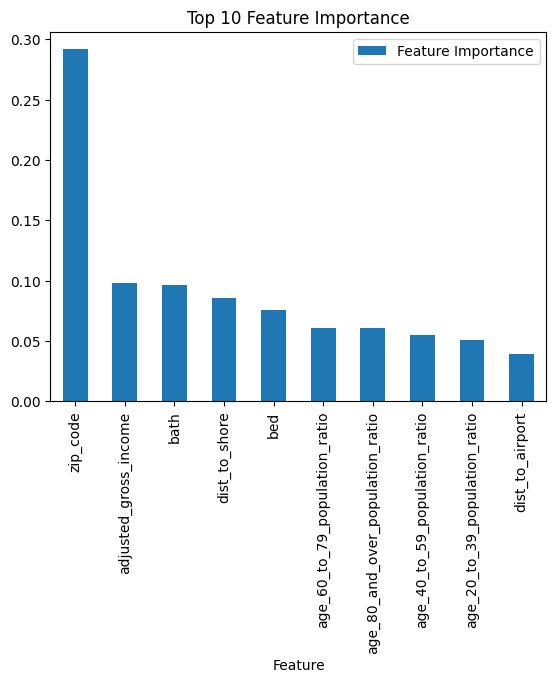

In [ ]:
# TO-DO: get feature importnce using built-in feature importance
feature_importance = rf.feature_importances_

# TO-DO: Get the top 10 and Create a DataFrame `feature_importance_df`
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Feature Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Feature Importance', ascending=False).head(10)
# TO-DO: Visualize the top 10 feature importance using a barplot
feature_importance_df.plot(kind='bar', x='Feature', y='Feature Importance', title='Top 10 Feature Importance')
plt.show()

##Neural Network, stochastic gradient descent

In [ ]:
# Include the meaningful features
features = real_estate_df[['adjusted_gross_income', 'bed', 'bath', 'zip_code',
                           'population_density', 'number_of_business',
                           'age_20_to_39_population_ratio',
                           'age_40_to_59_population_ratio',
                           'age_60_to_79_population_ratio',
                           'age_80_and_over_population_ratio',
                           'dist_to_shore',
                           'dist_to_highway',
                           'dist_to_airport']]
target = real_estate_df['price']

In [ ]:
# Remove Outliers or Clip Target (e.g., price < 10M)
target = target.clip(upper=1e7)

In [ ]:
# Log-transform Target
target_log = np.log1p(target)

In [ ]:
# Use scikit-learn's train_test_split function to split data for regression
# into train and test sets. The split should be 80-20 meaning 80% for training
# and rest for testing.
X_train, X_test, y_train, y_test = train_test_split(features, target_log, test_size=0.2, random_state=42)

In [ ]:
# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(64, 32),
                     activation='relu',
                     solver='sgd',
                     learning_rate_init=0.01,
                     max_iter=1000,
                     early_stopping=True,
                     random_state=42)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)

In [ ]:
# Train the Model
model.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)

In [ ]:
# Predict & Inverse Log Transform
y_pred_log = model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 10479692096.042255
Mean Absolute Error (MAE): 72122.05786892268
R² Score: 0.784893526577681


## PCA to Reduce Dimensionality

In [ ]:
# Standardize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Keep all components to analyze variance
pca = PCA()
pca_components = pca.fit_transform(scaled_features)


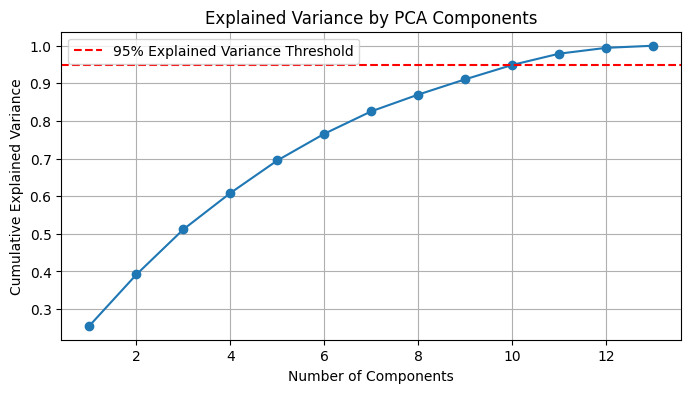

In [ ]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance Threshold')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
pca_df = pd.DataFrame(data=pca_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])


In [ ]:
pca_df['price'] = real_estate_df['price'].values


# Regression

##Linear Regression (Unregularized)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = pca_df.drop('price', axis=1)
y = pca_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R² Score:", r2_score(y_test, predictions))


R² Score: 0.5570140733361235


##Ridge Regression

In [ ]:
# Intermediate step to address scale-invariance
scaler = StandardScaler()
X_train_scaled3 = scaler.fit_transform(X_train)
X_test_scaled3 = scaler.transform(X_test)

In [ ]:
# Import required libraries
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")


# Initialize model with alpha = 10 (keep other hyperparameters as default values) and fit it on the training set
alpha = 10
reg_ridge = Ridge(alpha=alpha)
reg_ridge.fit(X_train_scaled3, y_train)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg_ridge.predict(X_test_scaled3)

# Find the R-squared score and store the value in `ridge_score`
ridge_score = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 21581673944.44847
Mean Absolute Error (MAE): 113218.27956370458
R² Score: 0.5570139150849779


##Random Forest Regression

In [ ]:
# Import required libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

# Initialize model with default parameters and fit it on the training set

reg_rf = RandomForestRegressor(random_state=42)
reg_rf.fit(X_train, y_train)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg_rf.predict(X_test)

# Find the R-squared score and store the value in `rfr_score`
rfr_score = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 8509620616.006884
Mean Absolute Error (MAE): 64695.941090955115
R² Score: 0.8253312727038615


# K Means clustering

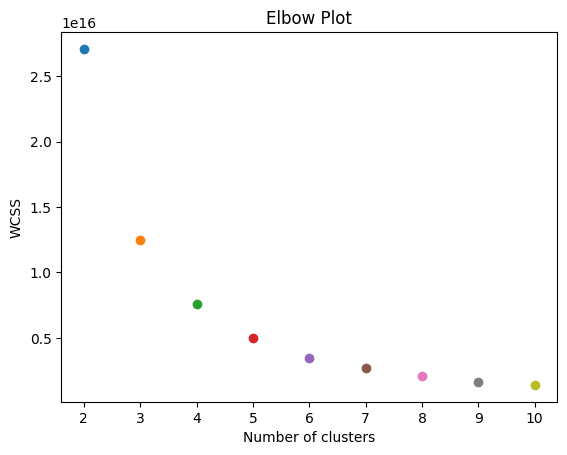

In [ ]:
# Import the necessary libraries
from sklearn.cluster import KMeans
from collections import Counter

#   for k ranges from 2 to 10, fit on "features" to generate an elbow plot
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=5, random_state=0)
    kmeans.fit(features)
    wcss = kmeans.inertia_
    plt.scatter(k, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()

In [ ]:
# choose the best number of clusters (the elbow)
number_of_cluster = 5

## Refit with best number of clusters

In [ ]:
# TO-DO: re-run the K-Means clustering with the best number of clusters, save the fitted model to `kmeans`
kmeans = KMeans(n_clusters= number_of_cluster, n_init= 5, random_state= 0)
kmeans.fit(features)

KMeans(n_clusters=5, n_init=5, random_state=0)